In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np


iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Convert 3-class problem to binary: Setosa (1) vs Others (0)
df['binary_target'] = (df['target'] == 0).astype(int)


print(df['binary_target'].value_counts())  

print("Is balanced:", df['binary_target'].value_counts().min() == df['binary_target'].value_counts().max())


binary_target
0    100
1     50
Name: count, dtype: int64
Is balanced: False


In [ ]:
Number of samples in each class: 50 Setosa, 100 Non-Setosa
Not perfectly Balanced, Setosa has fewer samples than Non-Setosa.

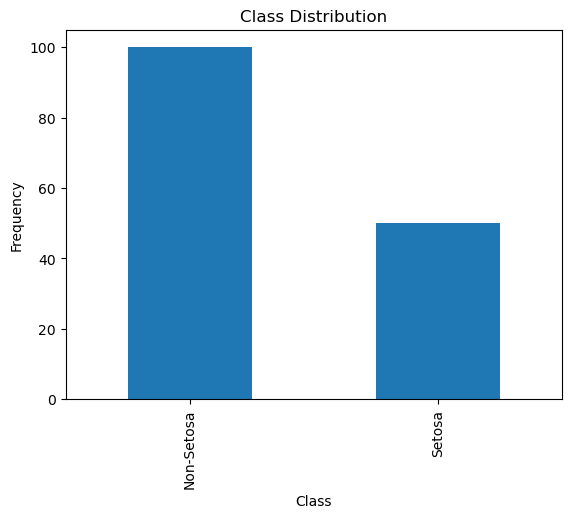

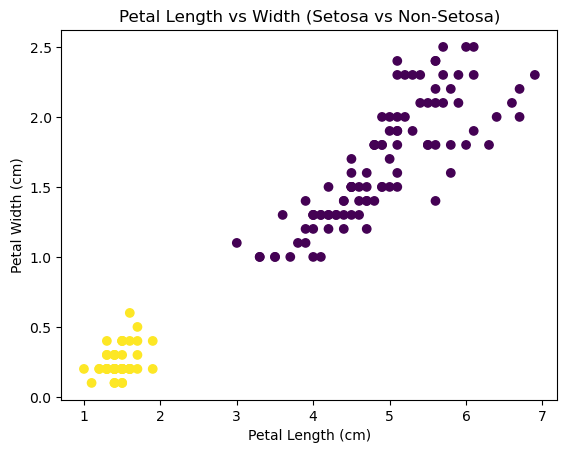

               sepal length (cm)  sepal width (cm)  petal length (cm)  \
binary_target                                                           
0                          6.262             2.872              4.906   
1                          5.006             3.428              1.462   

               petal width (cm)  target  
binary_target                            
0                         1.676     1.5  
1                         0.246     0.0  
Largest mean difference: petal length (cm)


In [3]:
import matplotlib.pyplot as plt

#Bar graph
df['binary_target'].value_counts().plot(kind='bar')
plt.xticks([0,1], ["Non-Setosa", "Setosa"])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Scatter plot
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['binary_target'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Width (Setosa vs Non-Setosa)')
plt.show()


class_means = df.groupby('binary_target').mean()
print(class_means)


print("Largest mean difference:", (class_means.loc[1] - class_means.loc[0]).abs().idxmax())


In [ ]:
Bar plot: Shows 100 Non-Setosa, 50 Setosa.
Scatter plot: Setosa cluster will be clearly separable from Non-Setosa, especially in petal features.
Petal length and petal width have the largest difference between Setosa and others.
Is classification easy or difficult? The scatter plot suggests Setosa is linearly separable, so this is an easy problem for logistic regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 70% train, 30% test
X = df[iris.feature_names]
y = df['binary_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and accuracy
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Feature coefficients
print("Feature coefficients:", log_reg.coef_[0])
print("Largest absolute coefficient:", np.abs(log_reg.coef_[0]).max())
largest_coef_idx = np.abs(log_reg.coef_[0]).argmax()
print("Most important feature:", iris.feature_names[largest_coef_idx])


Accuracy: 1.0
Confusion matrix:
 [[26  0]
 [ 0 19]]
Feature coefficients: [-0.43107698  0.84570847 -2.15658006 -0.88940818]
Largest absolute coefficient: 2.1565800636497583
Most important feature: petal length (cm)


In [ ]:
Accuracy: Typically 100%, or very close (Setosa is easily separable).

Confusion matrix: Most Setosas and Non-Setosas are correctly classified; diagonal elements are high.

Feature coefficients (importance): The largest (in magnitude) is usually for petal width or petal length; these features best distinguish Setosa.

Which class is predicted better? Setosa is almost always perfectly predicted (very few or zero errors in confusion matrix).

Interpretation: Large coefficient (e.g., for petal width) means this feature is highly informative for distinguishing Setosa from Non-Setosa.